# Part III: Training a model

Date: 23/08/2022

Authors: Jordi Bolibar & Facundo Sapienza

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Setup

At this point, `df_all` has all the data we will need to train, validate and test the model. However, before moving forward to training a machine learning model with this data, we need to separate an part of the dataset for testing the model and be sure we are not overfitting the model. 

For testing, we can use different strategies:
1. Separate all the measurements for some given set of glaciers and use all the rest for training/validation
1. Separate all the measurements for some given set of glaciers at period (2010-2020) and use all the rest for trainign/validation
1. Separate all the measurements for some given set of glaciers at the period 2010-2020 and use all the measurements for rest of the glaciers and the other period 2000-2010 for training/validation.

For simplicity, in this notebook we are going to implement the first one, but this may not be necessaraly the best option (why?). 

In [28]:
df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
df_all

PDD    area  icecap     lat     prcp_01  \
rgi_id         period                                                     
RGI60-08.00001 2000-2010  39.787001   0.030     0.0  67.930   59.556398   
               2010-2020  41.833601   0.030     0.0  67.930   57.685775   
RGI60-08.00002 2000-2010  44.907200   0.030     0.0  67.870   62.082497   
               2010-2020  46.980223   0.030     0.0  67.870   59.345685   
RGI60-08.00003 2000-2010  35.337201   0.020     0.0  67.820   60.485810   
...                             ...     ...     ...     ...         ...   
RGI60-08.03415 2010-2020  34.757735   0.056     0.0  66.729  131.108065   
RGI60-08.03416 2000-2010  66.325377  14.152     0.0  66.006  160.244277   
               2010-2020  66.505066  14.152     0.0  66.006  174.868147   
RGI60-08.03417 2000-2010  53.358777   0.150     0.0  65.923  152.880332   
               2010-2020  53.116888   0.150     0.0  65.923  165.529468   

                             prcp_02     prcp_03     prcp_04     prcp_05  \
rgi_id         period                                                      
RGI60-08.00001 2000-2010   42.393607   49.464068   40.707838   28.460900   
               2010-2020   45.119089   49.848962   37.706105   33.120270   
RGI60-08.00002 2000-2010   43.677873   49.432192   41.313322   28.519503   
               2010-2020   45.845166   49.957571   37.644466   32.577409   
RGI60-08.00003 2000-2010   45.600863   55.059464   46.842254   33.796713   
...                              ...         ...         ...         ...   
RGI60-08.03415 2010-2020  107.707591  144.610990   98.574383   92.859806   
RGI60-08.03416 2000-2010  183.438569  186.103358  190.792902  139.485696   
               2010-2020  146.277851  205.123464  136.355639  129.459209   
RGI60-08.03417 2000-2010  173.554018  177.555157  183.980329  133.112843   
               2010-2020  138.168895  196.729779  132.081722  123.916238   

                             prcp_06  ...   temp_09    temp_10    temp_11  \
rgi_id         period                 ...                                   
RGI60-08.00001 2000-2010   32.946557  ...  8.765555  13.037779  10.950000   
               2010-2020   41.740137  ...  8.942221  13.034446  11.120000   
RGI60-08.00002 2000-2010   32.153049  ...  9.274814  13.517038  11.384073   
               2010-2020   40.674079  ...  9.423703  13.538149  11.500740   
RGI60-08.00003 2000-2010   38.831589  ...  7.059999  11.433335   9.346666   
...                              ...  ...       ...        ...        ...   
RGI60-08.03415 2010-2020  111.586080  ...  4.860000   8.513335   7.726667   
RGI60-08.03416 2000-2010  115.362394  ...  6.778889   9.997777   9.253333   
               2010-2020  140.041785  ...  6.448889   9.764443   9.126666   
RGI60-08.03417 2000-2010  112.064028  ...  7.277778  10.505554   9.549999   
               2010-2020  134.381284  ...  6.947778  10.288887   9.436666   

                           temp_12    zmax    zmed    zmin    dmdtda  \
rgi_id         period                                                  
RGI60-08.00001 2000-2010  6.391112   250.0   242.0   235.0 -0.458772   
               2010-2020  7.227779   250.0   242.0   235.0 -0.356250   
RGI60-08.00002 2000-2010  6.784445   246.0   239.0   228.0 -0.458772   
               2010-2020  7.632223   246.0   239.0   228.0 -0.356250   
RGI60-08.00003 2000-2010  4.700001   749.0   726.0   701.0 -0.458772   
...                            ...     ...     ...     ...       ...   
RGI60-08.03415 2010-2020  4.133333  1330.0  1314.0  1289.0  0.534500   
RGI60-08.03416 2000-2010  5.060001  1811.0  1581.0   890.0 -0.737400   
               2010-2020  5.783334  1811.0  1581.0   890.0 -0.649400   
RGI60-08.03417 2000-2010  5.363334  1318.0  1186.0  1090.0 -0.616100   
               2010-2020  6.070001  1318.0  1186.0  1090.0  0.389200   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-08.00001 2000-2010    

In [18]:
# We select a subset of glaciers and use them for test and the rest for training
glaciers_ids = np.unique(df_all.index.get_level_values(0).values)

glacier_train, glacier_test = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[glacier_train]
df_test = df_all.loc[glacier_test]
df_train.shape, df_test.shape

((5466, 37), (1368, 37))

In [19]:
df_train_X = df_train.drop([ 'dmdtda', 'err_dmdtda', 'target_id'], axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_test_X = df_test.drop(['dmdtda', 'err_dmdtda', 'target_id'], axis=1)
df_test_y = df_test[['dmdtda']]

X_test, y_test = df_test_X.values, df_test_y.values

In [20]:
df_train_X

PDD   area  icecap     lat     prcp_01  \
rgi_id         period                                                    
RGI60-08.01982 2000-2010  83.527327  0.143     0.0  62.538  124.104991   
               2010-2020  83.089875  0.143     0.0  62.538  125.415061   
RGI60-08.02316 2000-2010  46.975379  0.690     0.0  66.919  106.732497   
               2010-2020  47.168845  0.690     0.0  66.919  114.094067   
RGI60-08.02087 2000-2010  40.494045  0.076     0.0  68.117   75.592732   
...                             ...    ...     ...     ...         ...   
RGI60-08.02060 2010-2020  84.329264  0.871     0.0  68.359  183.425421   
RGI60-08.01373 2000-2010  58.342986  0.454     0.0  67.398  131.757897   
               2010-2020  58.979230  0.454     0.0  67.398  141.384587   
RGI60-08.02982 2000-2010  68.853576  2.260     0.0  61.033  208.560000   
               2010-2020  68.614953  2.260     0.0  61.033  200.179425   

                             prcp_02     prcp_03     prcp_04     prcp_05  \
rgi_id         period                                                      
RGI60-08.01982 2000-2010  143.918559  158.575565  156.773291  109.984306   
               2010-2020  115.370223  167.737702  109.283704   94.201822   
RGI60-08.02316 2000-2010  109.090973  116.596959  114.208952   93.149256   
               2010-2020   90.956381  121.481741   83.149542   81.002893   
RGI60-08.02087 2000-2010   77.355326   80.686061   77.169174   69.097516   
...                              ...         ...         ...         ...   
RGI60-08.02060 2010-2020  137.699367  157.291086  106.782582  112.286725   
RGI60-08.01373 2000-2010  123.736649  135.451302  128.844108  115.355791   
               2010-2020  106.065886  138.339842   93.448721   97.701689   
RGI60-08.02982 2000-2010  196.120727  200.251825  206.131678  130.636495   
               2010-2020  168.528494  208.480443  153.558994  115.180301   

                             prcp_06  ...   temp_06   temp_07   temp_08  \
rgi_id         period                 ...                                 
RGI60-08.01982 2000-2010   98.584393  ... -2.763334  1.615556  6.050371   
               2010-2020  115.303055  ... -2.352222  1.184444  5.992593   
RGI60-08.02316 2000-2010   71.919510  ... -8.378887 -2.943333  1.752222   
               2010-2020   98.297448  ... -7.822221 -3.170000  2.038889   
RGI60-08.02087 2000-2010   50.788818  ... -8.666667 -3.360000  1.720000   
...                              ...  ...       ...       ...       ...   
RGI60-08.02060 2010-2020  150.096918  ... -1.253333  1.718889  5.815555   
RGI60-08.01373 2000-2010   84.389049  ... -6.530370 -1.449260  3.065185   
               2010-2020  121.363783  ... -6.014814 -1.624815  3.436296   
RGI60-08.02982 2000-2010  115.782873  ... -4.127778  0.040000  4.353333   
               2010-2020  121.402378  ... -3.641111 -0.306667  4.279999   

                           temp_09    temp_10    temp_11   temp_12    zmax  \
rgi_id         period                                                        
RGI60-08.01982 2000-2010  9.212593  11.710741  11.230000  7.333334  1415.0   
               2010-2020  9.011482  11.438519  10.948889  7.576667  1415.0   
RGI60-08.02316 2000-2010  6.495556  10.050000   8.911112  4.285555  1387.0   
               2010-2020  6.148889   9.816667   8.704445  5.155556  1387.0   
RGI60-08.02087 2000-2010  6.793333  10.606667   9.360000  4.382223  1097.0   
...                            ...        ...        ...       ...     ...   
RGI60-08.02060 2010-2020  8.385555  11.935555  11.643333  8.865555   896.0   
RGI60-08.01373 2000-2010  7.512963  10.990370  10.052223  5.538148  1174.0   
               2010-2020  7.178519  10.801481   9.877779  6.484815  1174.0   
RGI60-08.02982 2000-2010  8.205556  10.756665  10.199999  6.231112  1661.0   
               2010-2020  8.078889  10.473332   9.889999  6.424445  1661.0   

                            zmed    zmin  
rgi_id         period                     
RGI

## Training a model 

The `sklearn` package includes multiple regression models we can try on the dataset. One of the advantages of using `sklearn` is that the syntax and logic is shared among different algorithms, making easy to try and compare different models. The [sklearn documentation](https://scikit-learn.org/stable/auto_examples/index.html#examples) includes multiple of these examples that are worth exploring. 

Some regression methods to explore include
1. Clasical continouos regression approaches: linear regression, logistic regression, support vector machines
1. Tree-based regression: decision trees, random forest, ensamble methods based on boosting
1. Neural networks

The following plot function will be useful in order to report the performance of the different models.

In [22]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### Linear Regression

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

For linear regression and many other methods, we will scale the data to have zero mean and unit variance.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ElasticNet is a linear regression model that includes the classical ordinary least square error estimatior (`alpha=0.0`), Lasso (`l1_ratio=1`) and Ridge (`l1_ratio=0`) regression in one single method. 

In [26]:
%time
reg_linear = ElasticNet(alpha=0.001,
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

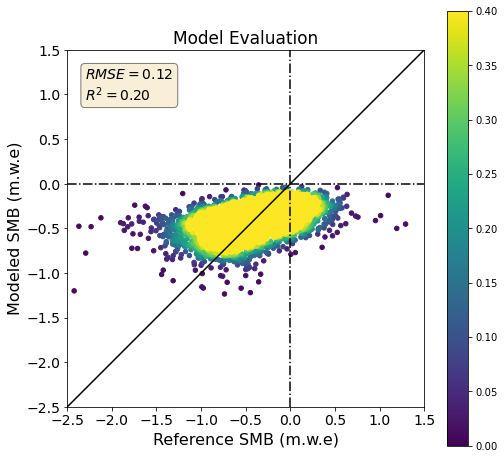

In [27]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

### Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [15]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=5, 
                                 min_samples_split=5)
reg_tree.fit(X_train, y_train)

CPU times: user 50.2 ms, sys: 2.78 ms, total: 53 ms
Wall time: 51.5 ms


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0)

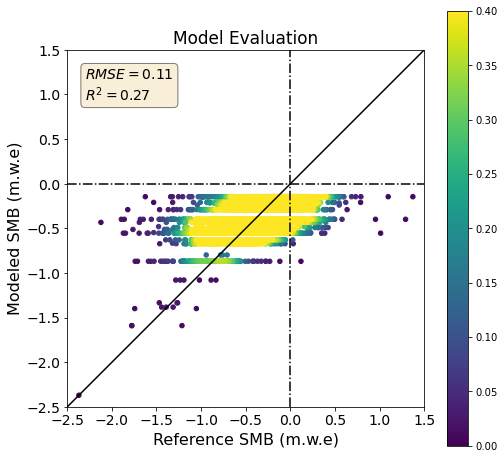

In [16]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

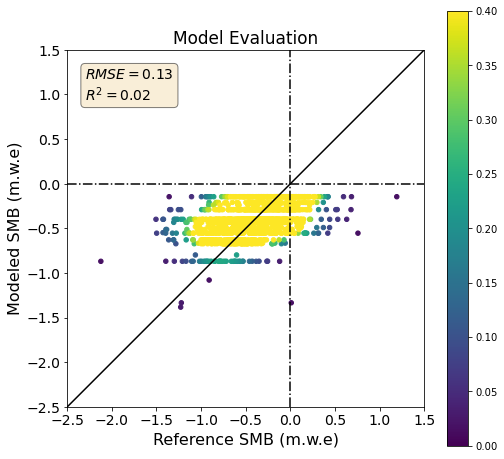

In [17]:
plot_prediction(y_test, reg_tree.predict(X_test), n_toplot=5000)

How well does this behave in test set?

### Ensamble of trees

We can try examples of models that combine slow learners. This models tend to work very well and be quite general. However, tunning the different hyper-parameters of the model can be tricky and something that will be explore in deeper detail in the next notebook. 

Example based on [Gradient boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py)

In [18]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [19]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 100,
        "max_depth": 4,
        "min_samples_split": 15,
        "criterion": "squared_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [20]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/.conda/envs/MB_Finsen/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 13 s, sys: 569 µs, total: 13 s
Wall time: 13 s


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

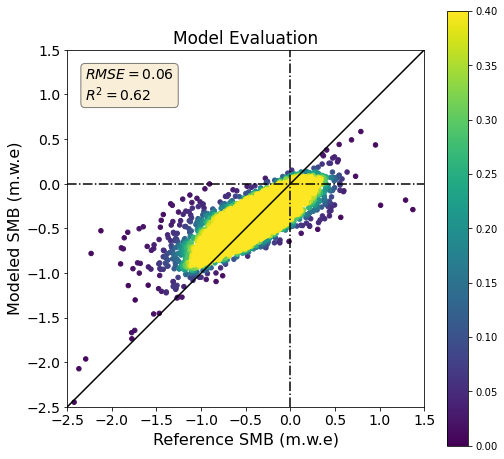

In [21]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

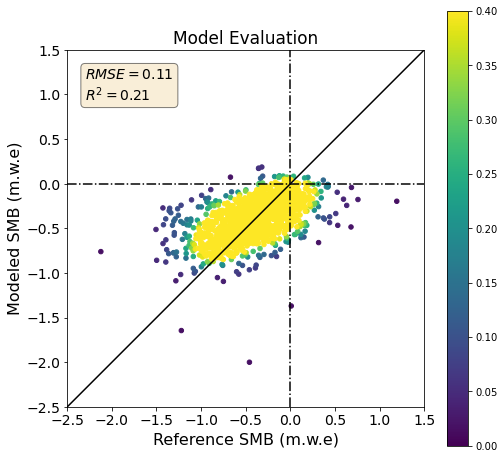

In [22]:
plot_prediction(y_test, reg_ensemble.predict(X_test), n_toplot=5000)

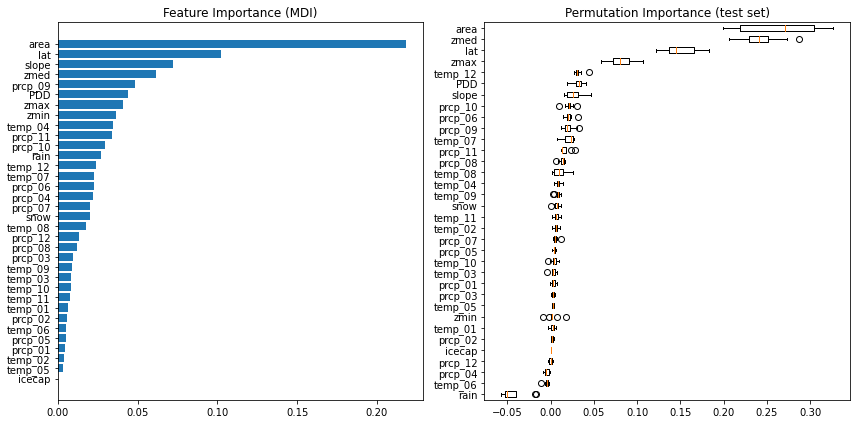

In [23]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Neural Network

In [24]:
from sklearn.neural_network import MLPRegressor

In [65]:
reg_nn = MLPRegressor(hidden_layer_sizes=(50,30,20,10),
                      activation='relu',
                      solver='lbfgs', 
                      batch_size=100, 
                      max_iter=200,
                      learning_rate='adaptive', 
                      shuffle=True, 
                      validation_fraction=0.1)

In [66]:
%%time
reg_nn.fit(X_train_scaled, y_train)

/home/jovyan/.conda/envs/MB_Finsen/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 9.46 s, sys: 4.99 s, total: 14.4 s
Wall time: 3.7 s


/home/jovyan/.conda/envs/MB_Finsen/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

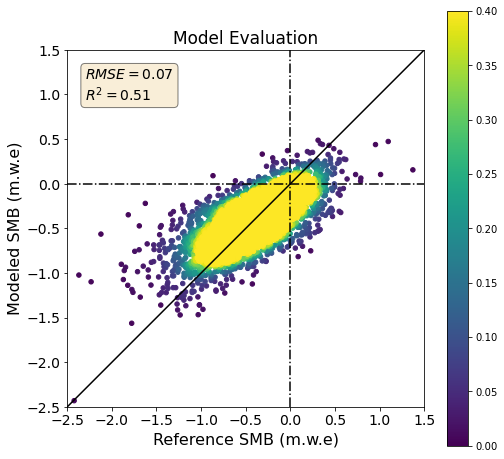

In [67]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

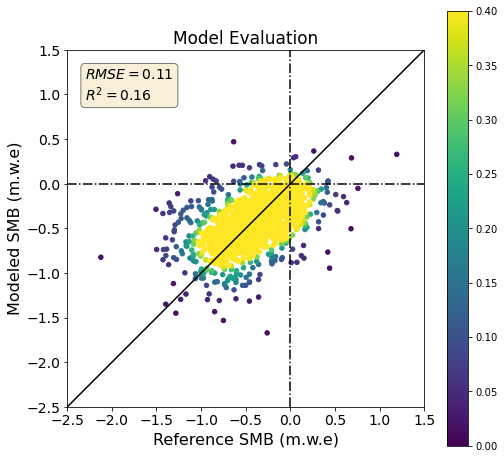

In [68]:
plot_prediction(y_test, reg_nn.predict(X_test_scaled), n_toplot=5000)